In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import utils

## Data preparation

In [2]:
df = pd.read_csv('ts_spectral_dataset.csv')
df.set_index('track_id', inplace=True)

tracks = utils.load('./fma_metadata/tracks.csv')

In [3]:
# Creo il dataframe con le colonne 'favorites' e 'title'
tracce = tracks['track']
preferite = tracce[['favorites','title']]

In [4]:
# Unisco i dataframe su 'track_id' 
x = pd.merge(df, preferite, on="track_id")

# Visualizzo le canzoni preferite del dataset 
print(x[['title','favorites']].sort_values(by='favorites', ascending=False))

                      title  favorites
track_id                              
42377             Night Owl       1482
69170            Enthusiast        765
55718               Kopeika        554
28553               Lullaby        393
54159         11 strANGE Ls        297
...                     ...        ...
25104       Black Cat Veins          0
34996                Ritual          0
68410                  ORCR          0
35199     Know (Nick Drake)          0
3832            Bedoin Song          0

[3615 rows x 2 columns]


Le canzoni con più preferenze sono:
- Night Owl, track_id: 42377
- Enthusiast, track_id: 69170
- Kopeika, track_id: 55718

In [5]:
# Ordino il dataframe per 'favorites'
df = x.sort_values(by='favorites', ascending=False)

# Infine rimuovo 'favorites' e 'title'
df = df.drop('favorites', axis=1)
df = df.drop('title', axis=1)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,303,304,305,306,307,308,309,310,311,312
track_id,,,,,,,,,,,,,,,,,,,,,
42377,0.621915,0.742323,0.924943,1.000000,0.837181,0.658531,0.485502,0.590432,0.471506,0.433407,...,0.925755,0.941087,0.834342,0.522846,0.448415,0.601406,0.484715,0.303159,0.166888,0.098973
69170,0.543490,0.529625,0.551060,0.576972,0.436729,0.306594,0.338820,0.419691,0.304029,0.332019,...,0.626049,0.495308,0.447242,0.439863,0.366979,0.460761,0.443818,0.365632,0.301938,0.147258
55718,0.000000,0.105785,0.518673,0.717345,0.622435,0.404640,0.430112,0.399528,0.223192,0.143650,...,0.574837,0.737451,0.734091,0.531956,0.496200,0.511264,0.441631,0.638829,0.832321,0.796473


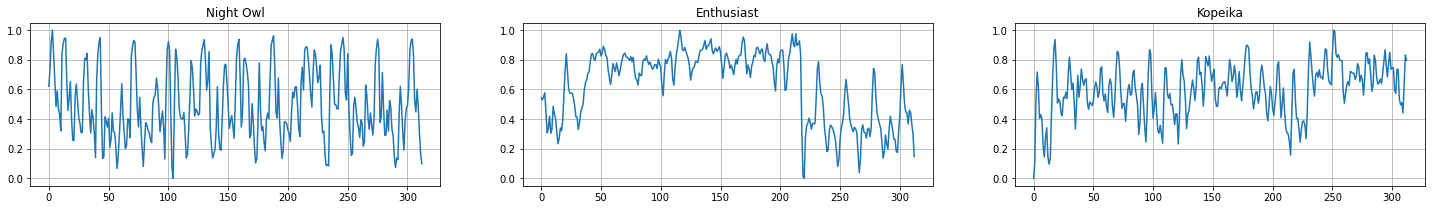

In [6]:
# Salvo le top 3 canzoni in 3 variabili 
ts1 = df.iloc[0]
ts2 = df.iloc[1]
ts3 = df.iloc[2]

fig = plt.figure(figsize=(25, 3)) 
fig_dims = (1,3)

plt.subplot2grid(fig_dims, (0, 0))
ts1.plot(title='Night Owl')
plt.grid()

plt.subplot2grid(fig_dims, (0, 1))
ts2.plot(title='Enthusiast')
plt.grid()

plt.subplot2grid(fig_dims, (0, 2))
ts3.plot(title='Kopeika')
plt.grid()

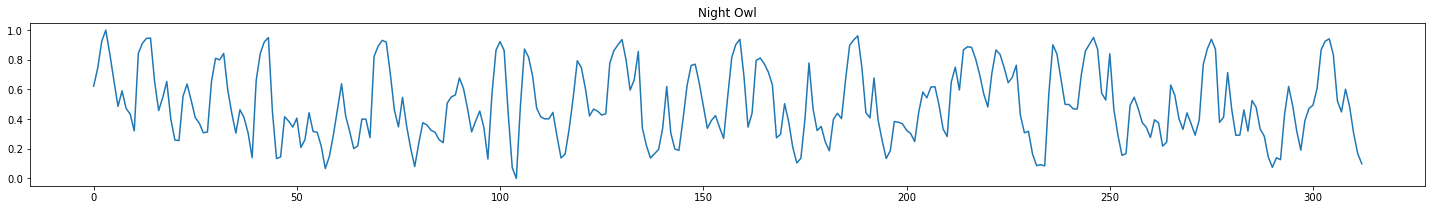

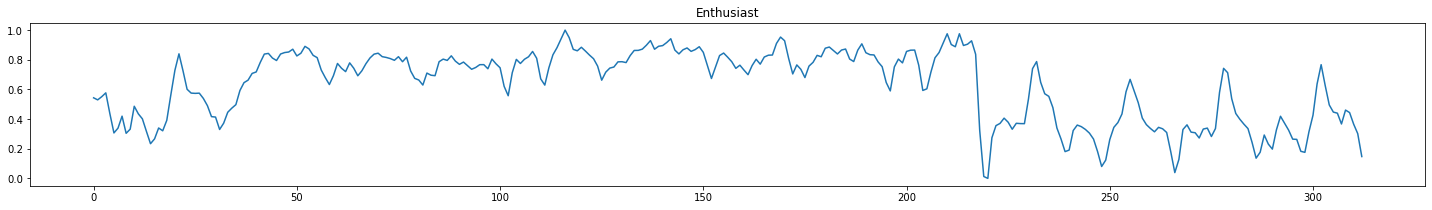

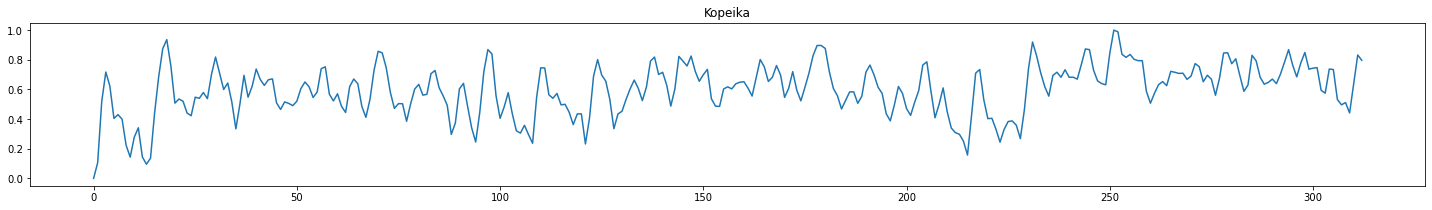

In [7]:
plt.figure(figsize=(25, 3))
ts1.plot(title='Night Owl')
plt.show()
plt.figure(figsize=(25, 3))
ts2.plot(title='Enthusiast')
plt.show()
plt.figure(figsize=(25, 3))
ts3.plot(title='Kopeika')
plt.show()

In [8]:
# Info su Night Owl
echonest = utils.load('./fma_metadata/echonest.csv')
info = echonest['echonest', 'metadata']
info.loc[[42377]]

,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release
track_id,,,,,,,
42377,NaN,Directionless,36.974,"Santa Cruz, CA, US",-122.031,Broke For Free,Directionless EP


In [9]:
tracce.loc[[42377]]

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
42377,320000,37,NaN,2011-01-18 12:05:20,NaT,194,1482,Electronic,"[15, 184]","[184, 15]",NaN,3293557,NaN,Creative Commons Attribution,543252,NaN,1,NaN,"[trip hop, tracks to sync, stellar]",Night Owl


# TS1 - Night Owl

In [10]:
from matrixprofile import *
from matrixprofile.discords import discords

#### Matrix profile

m = 5


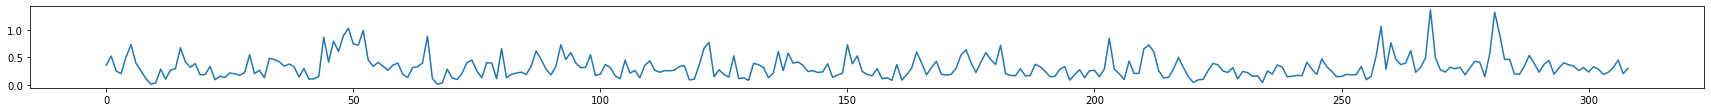

m = 20


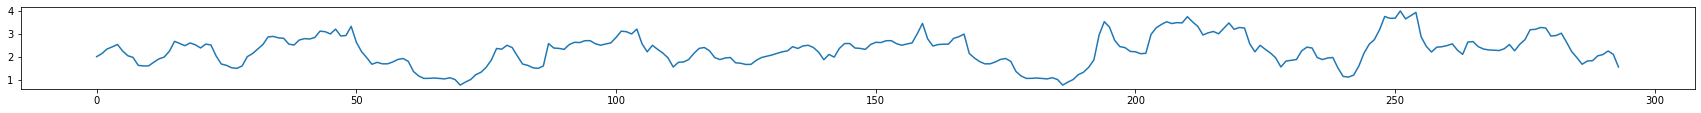

m = 50


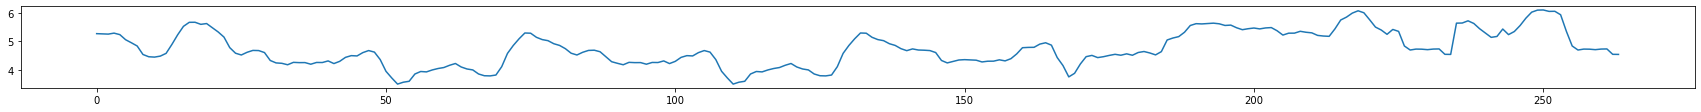

m = 100


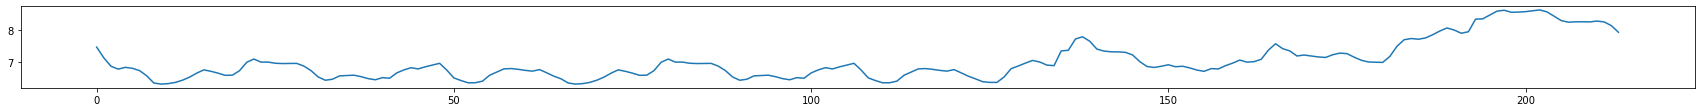

In [11]:
#### Testo diversi valori per m, ossia la lunghezza delle subparts

for m in [5,20,50,100]:

    mp, mpi = matrixProfile.stomp(ts1.values, m)
    print('m =',m)
    plt.figure(figsize=(30, 1.5)) 
    plt.plot(mp)
    plt.show()

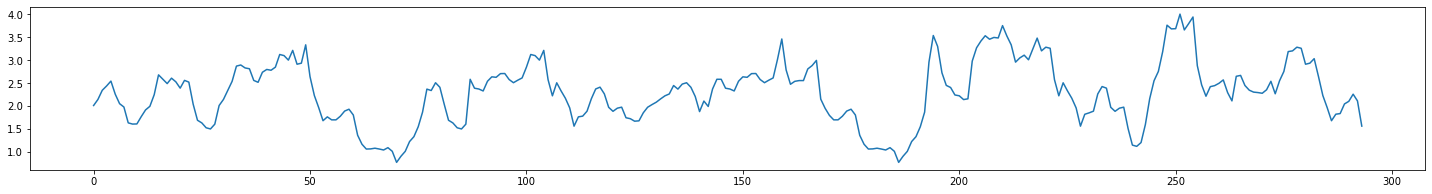

In [12]:
# Seleziono il parametro migliore

mp, mpi = matrixProfile.stomp(ts1.values, 20)
plt.figure(figsize=(25, 3))
plt.plot(mp)
plt.show()

w = 20 #sarebbe m, la chiamo w per non cambiare tutti i codici dopo

### Motif discovery

Cerco di ottenere il risultato suggerito dal matrix profile, ossia 3 motifs.

In [13]:
mo, mod  = motifs.motifs(ts1.values, (mp, mpi))
print(mo)
print(mod)

#mo indica in che momento appaiono i motifs
#mod distances: Minimum Matrix profile value for each motif set
#n_neighbors non cambia niente da 2 in poi
#radius indica il raggio entro cui cercare vicini (più è ampio più vengono inclusi elementi diversi dai motif)
#ex_zone: distanza minima tra indici dei motif (più è ampia meno motif fa registrare)

[[70, 186], [125, 241], [27, 85, 143]]
[0.7693703807616226, 1.119465644376609, 1.499120876259696]


Parameters
- max_motifs: stop finding new motifs once we have max_motifs
- radius: For each motif found, find neighbors that are within radius*motif_mp of the first.
- n_neighbors: number of neighbors from the first to find. If it is None, find all.
- ex_zone: minimum distance between indices for after each subsequence is identified. Defaults to m/2 where m is the subsequence length. If ex_zone = 0, only the found index is exclude, if ex_zone = 1 then if idx is found as a motif idx-1, idx, idx+1 are excluded.

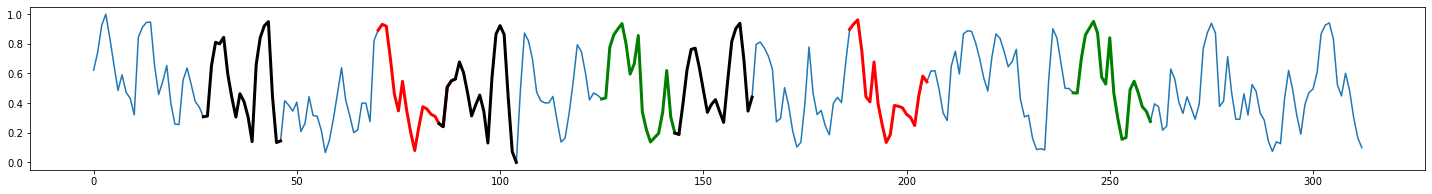

In [14]:
plt.figure(figsize=(25, 3)) 
plt.plot(ts1.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts1.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

<ipython-input-15-14da6b30557e>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30, 1.5))


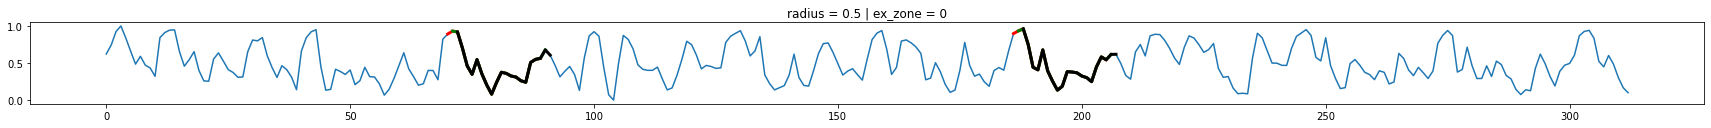

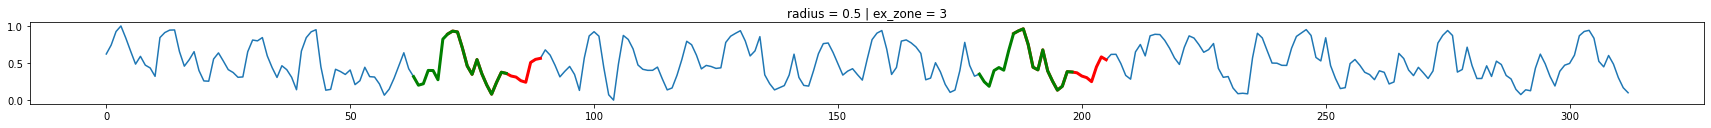

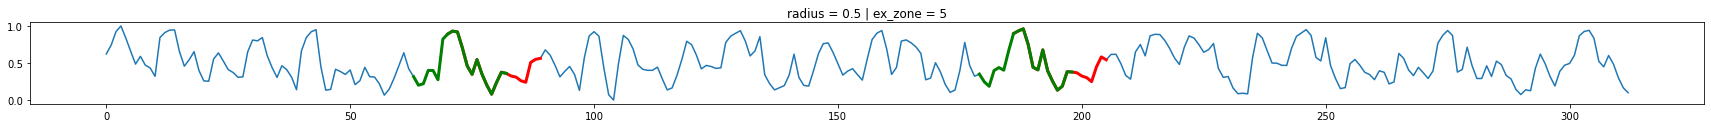

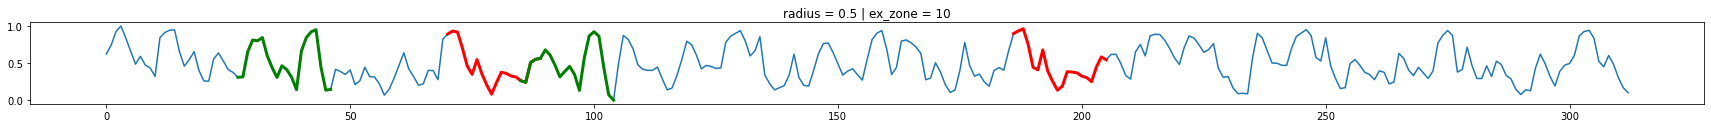

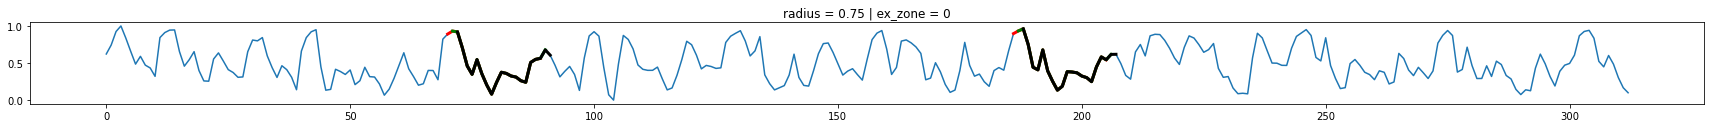

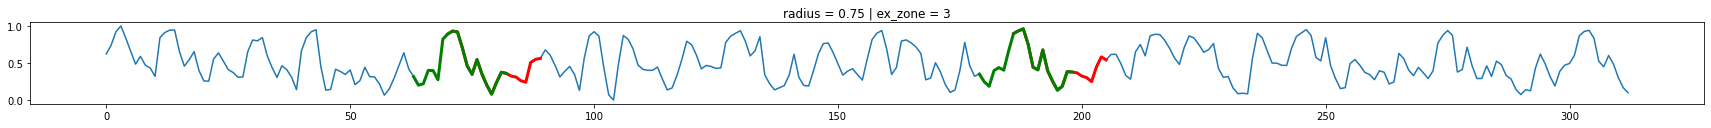

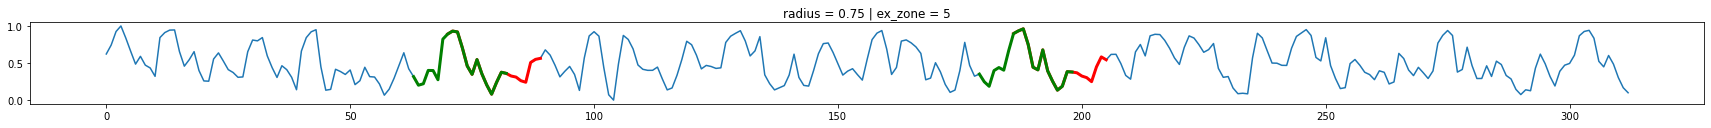

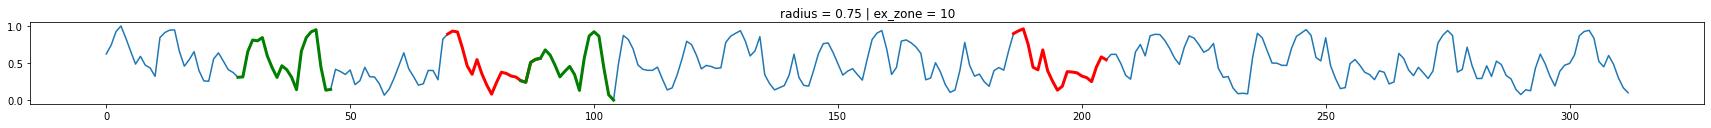

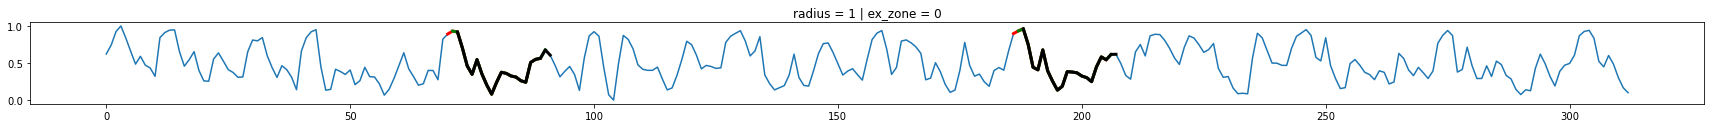

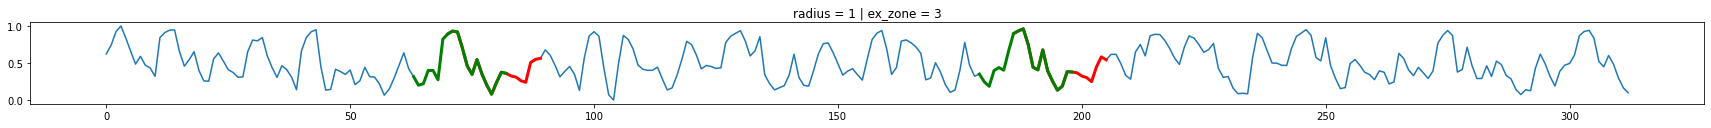

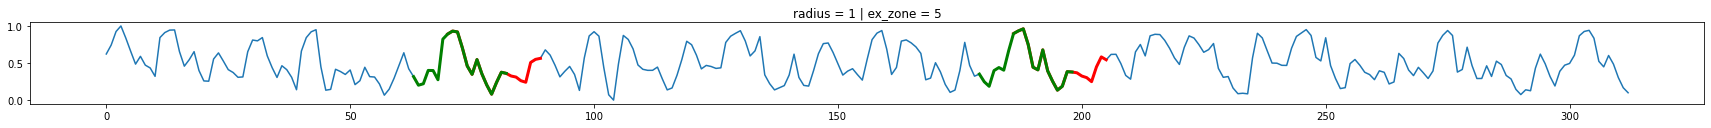

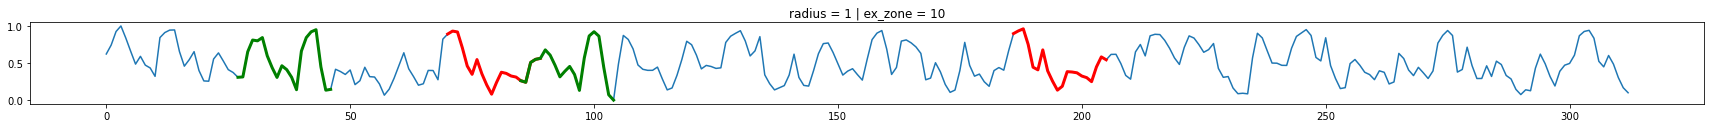

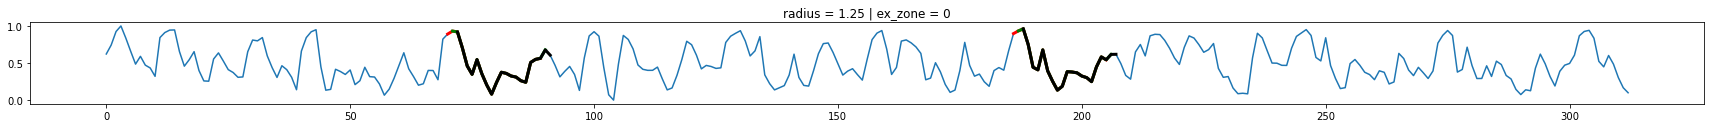

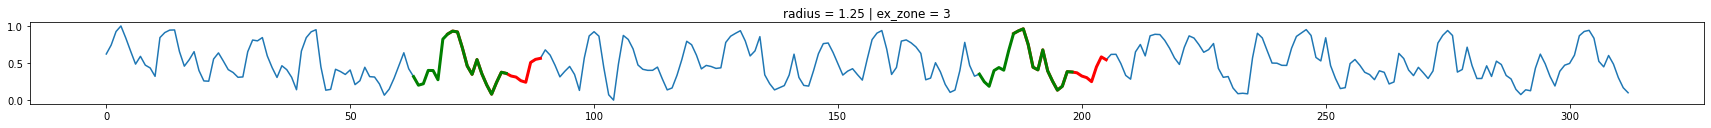

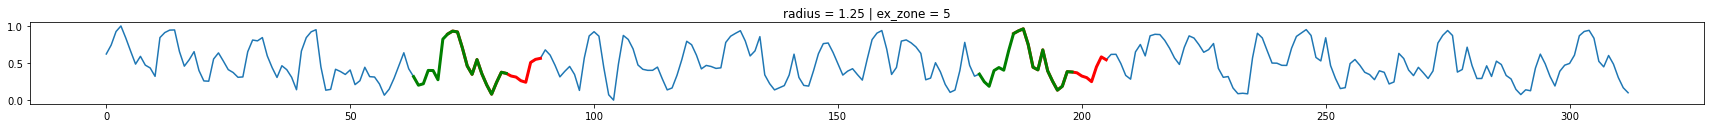

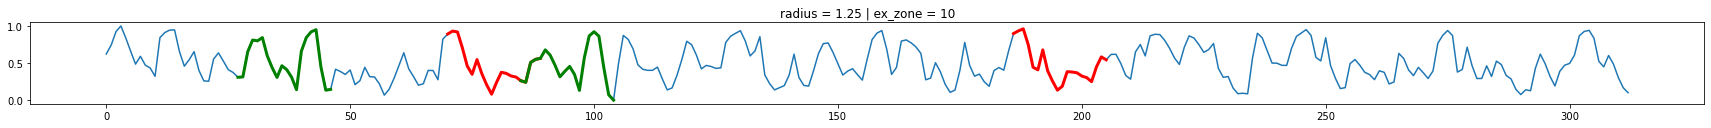

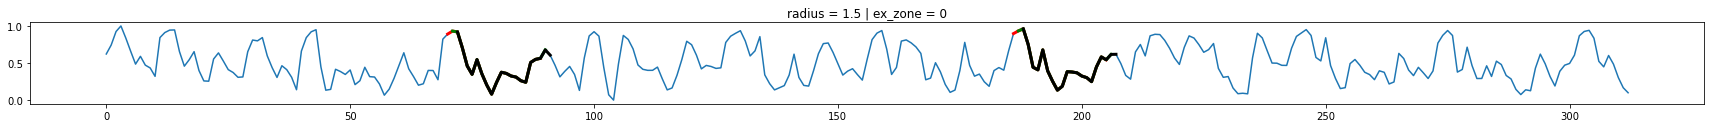

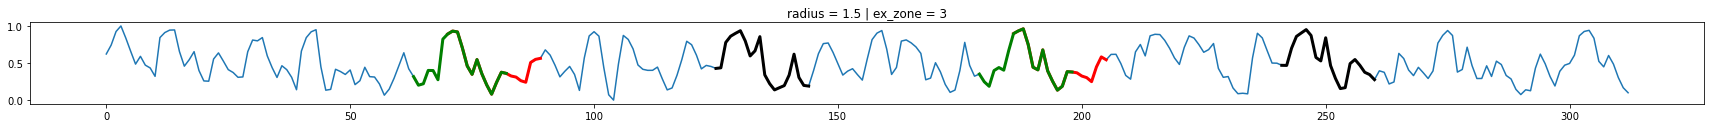

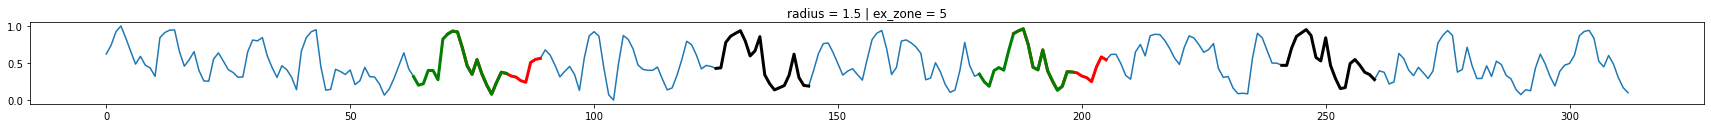

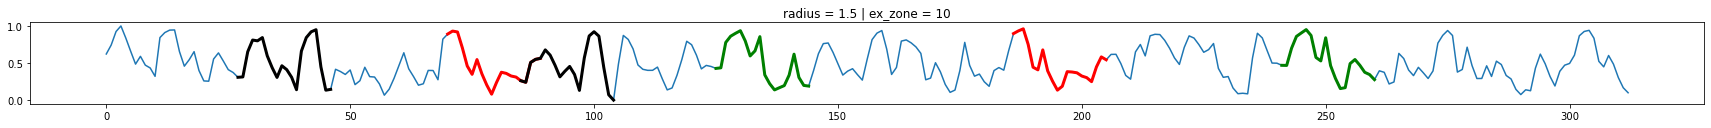

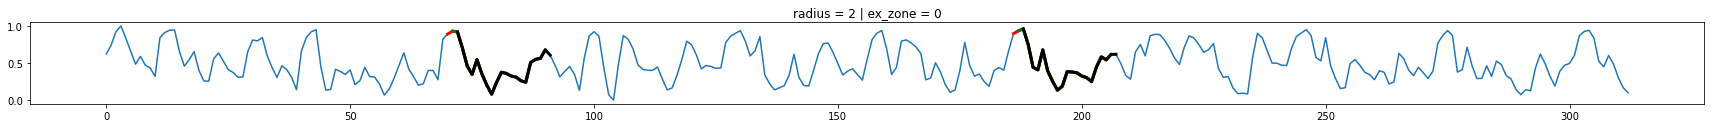

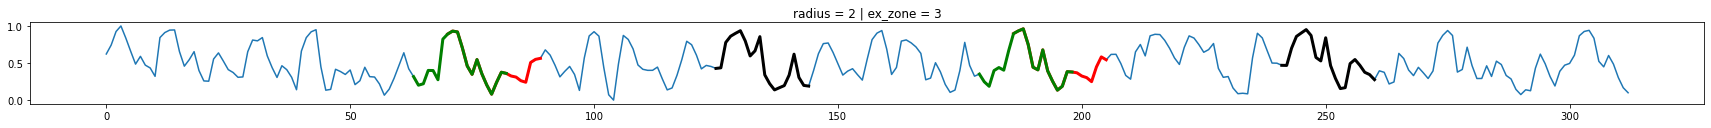

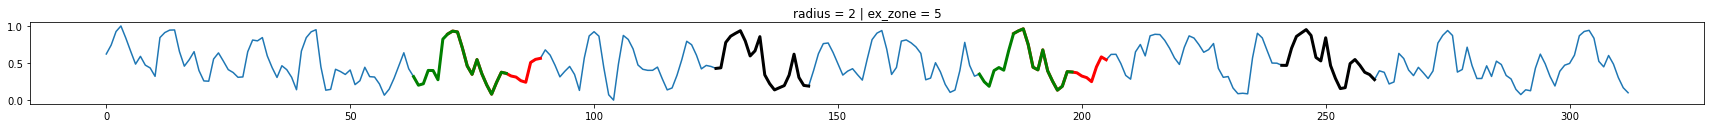

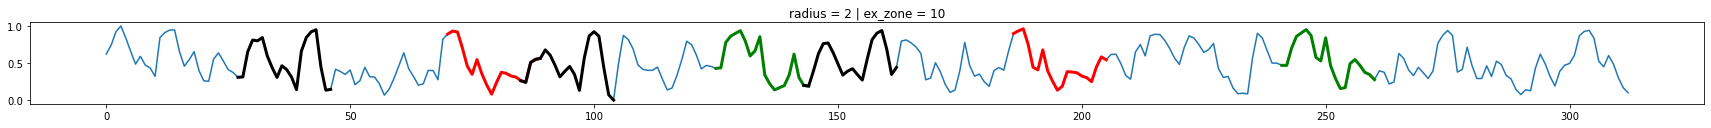

In [15]:
raggi = [0.5, 0.75, 1, 1.25, 1.5, 2]
esclusione = [0,3,5,10]


for r in raggi:
    for e in esclusione:
        mo, mod  = motifs.motifs(ts1.values, (mp, mpi), radius=r, ex_zone=e)

        plt.figure(figsize=(30, 1.5)) 
        plt.plot(ts1.values)
        plt.title('radius = {} | ex_zone = {}'.format(r,e))
        colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
        for m, d, c in zip(mo, mod, colors):
            for i in m:
                m_shape = ts1.values[i:i+w]
                plt.plot(range(i,i+w), m_shape, color=c, lw=3)

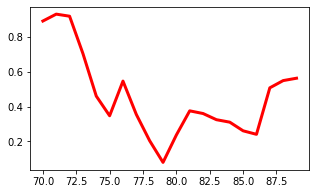

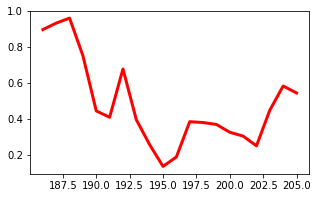

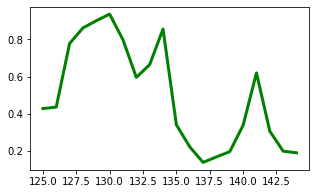

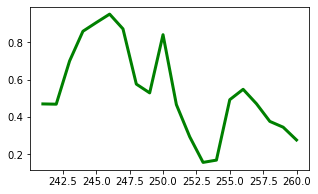

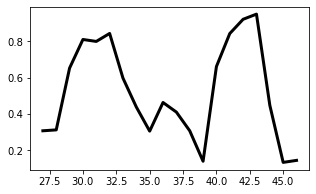

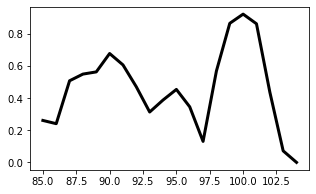

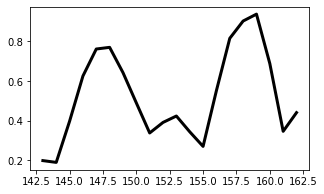

In [16]:
# Scelta parametri migliori (sono quelli di default)
mo, mod  = motifs.motifs(ts1.values, (mp, mpi))

# Visualizzo i motifs
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts1.values[i:i+w]
        plt.figure(figsize=(5, 3))
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    
    plt.show()

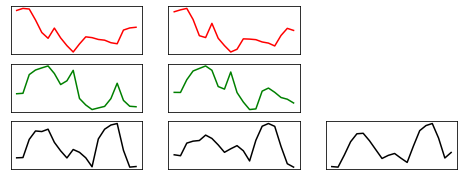

In [79]:
# Scelta parametri migliori (sono quelli di default)
mo, mod  = motifs.motifs(ts1.values, (mp, mpi))
motivi = []
# Visualizzo i motifs
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts1.values[i:i+w]
        motivi.append(m_shape)

fig = plt.figure(figsize=(8, 3)) 
fig_dims = (3,3)

plt.subplot2grid(fig_dims, (0, 0))
plt.plot(motivi[0], color='red')
plt.xticks([])
plt.yticks([])
plt.grid()

plt.subplot2grid(fig_dims, (0, 1))
plt.plot(motivi[1], color='red')
plt.xticks([])
plt.yticks([])
plt.grid()

plt.subplot2grid(fig_dims, (1, 0))
plt.plot(motivi[2], color='green')
plt.xticks([])
plt.yticks([])
plt.grid()

plt.subplot2grid(fig_dims, (1, 1))
plt.plot(motivi[3], color='green')
plt.xticks([])
plt.yticks([])
plt.grid()

plt.subplot2grid(fig_dims, (2, 0))
plt.plot(motivi[4], color='black')
plt.xticks([])
plt.yticks([])
plt.grid()

plt.subplot2grid(fig_dims, (2, 1))
plt.plot(motivi[5], color='black')
plt.xticks([])
plt.yticks([])
plt.grid()

plt.subplot2grid(fig_dims, (2, 2))
plt.plot(motivi[6], color='black')
plt.xticks([])
plt.yticks([])
plt.grid()

### Anomaly discovery

Parameters  
- mp: matrix profile numpy array
- k: the number of discords to discover
- ex_zone: the number of samples to exclude and set to Inf on either side of a found discord 

Returns 
 - a list of indexes represent the discord starting locations. MaxInt indicates there were no more discords that could be found due to too many exclusions or profile being too small. Discord start indices are sorted by highest matrix profile value.

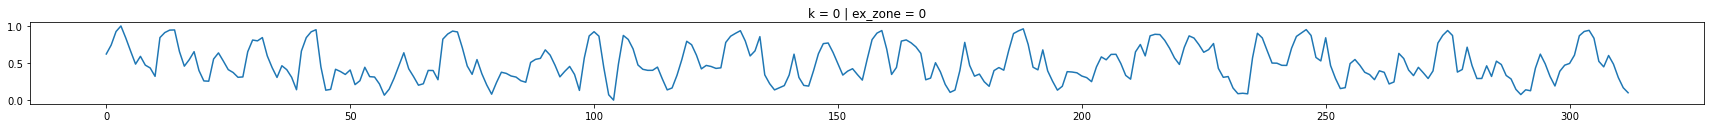

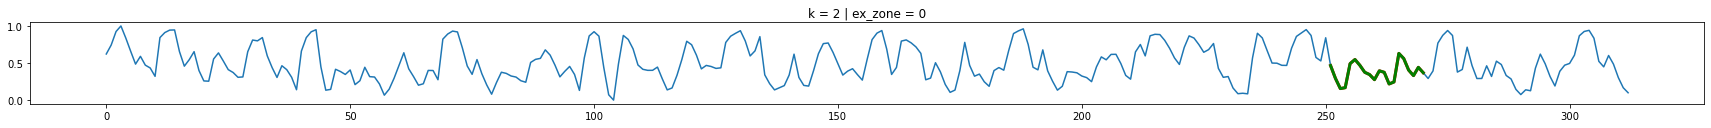

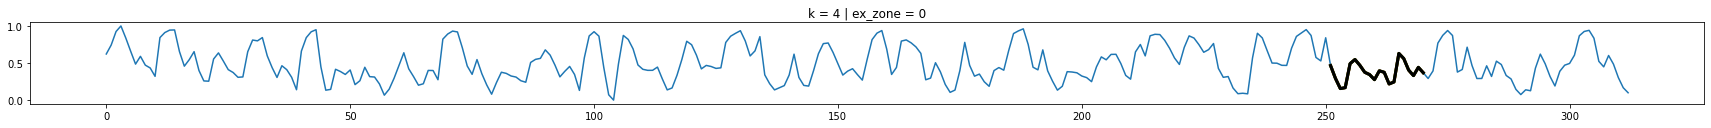

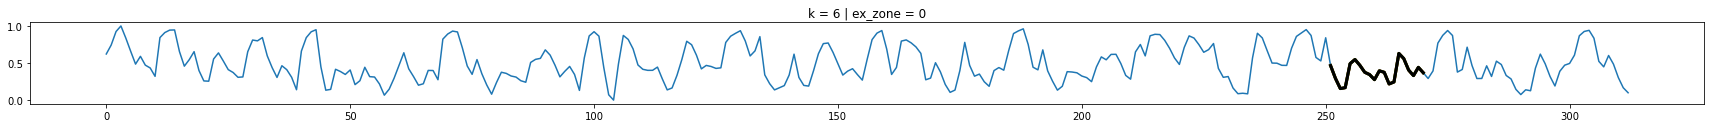

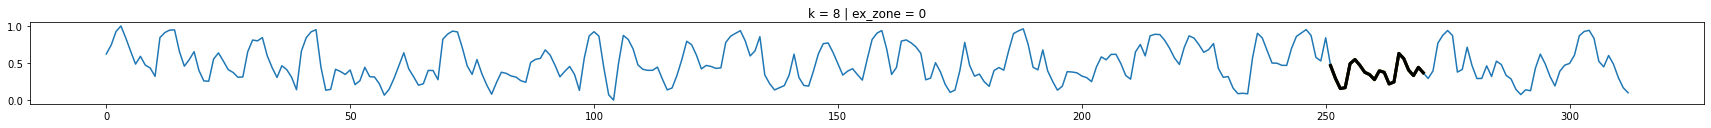

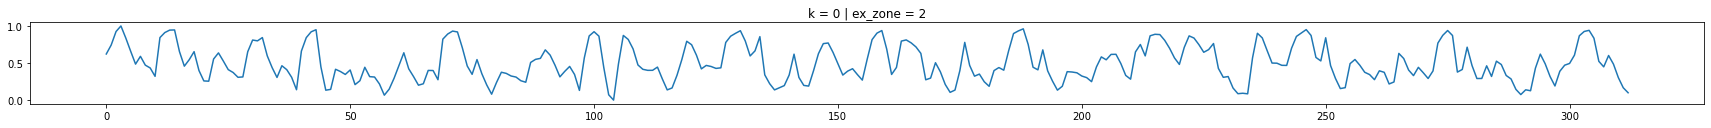

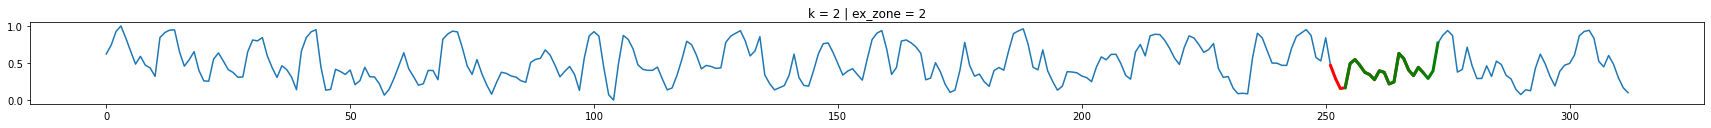

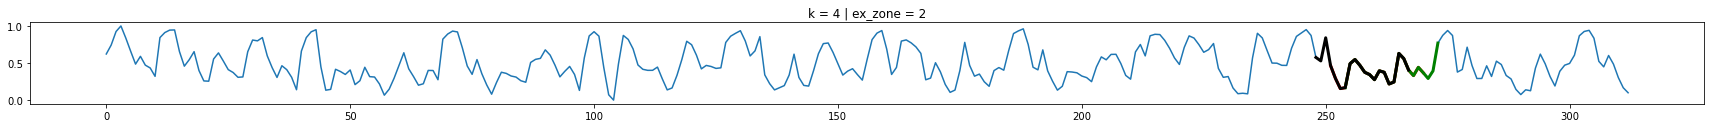

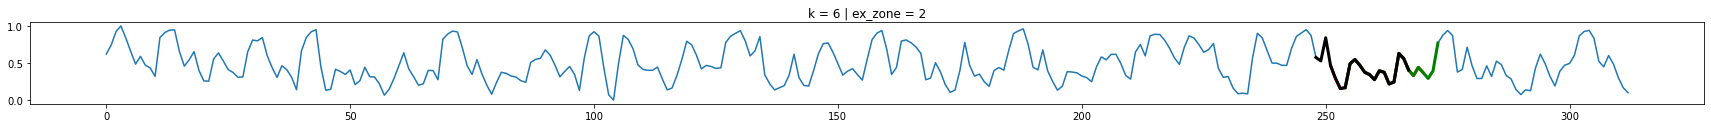

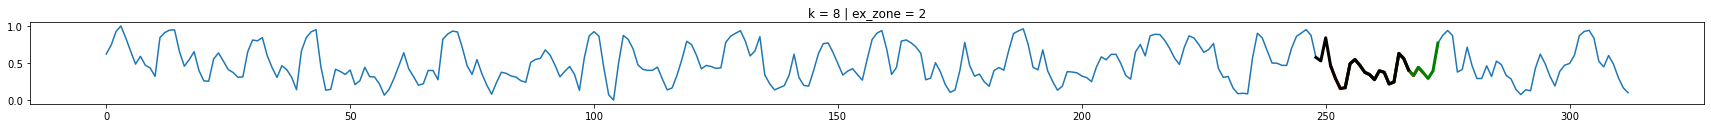

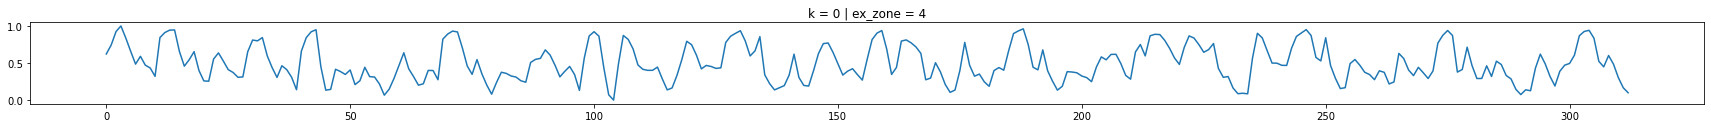

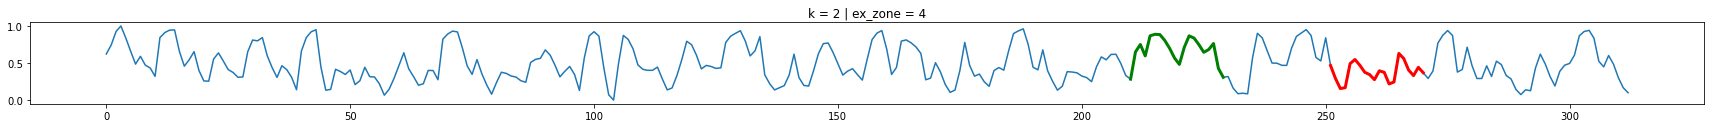

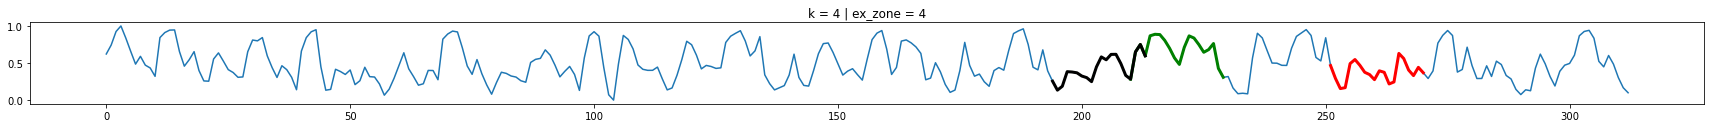

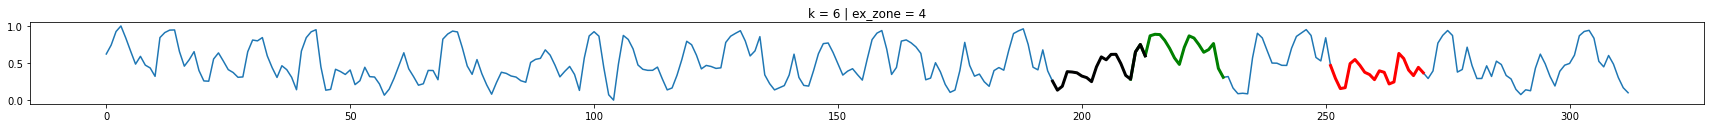

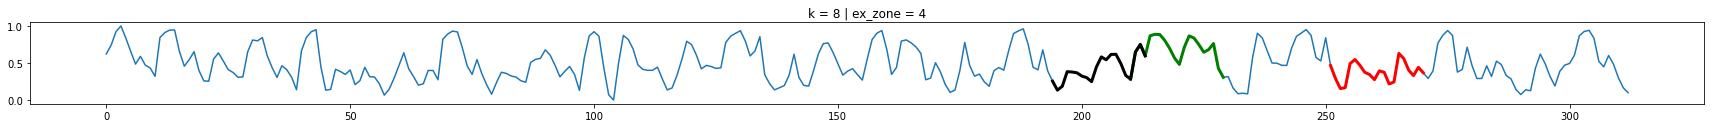

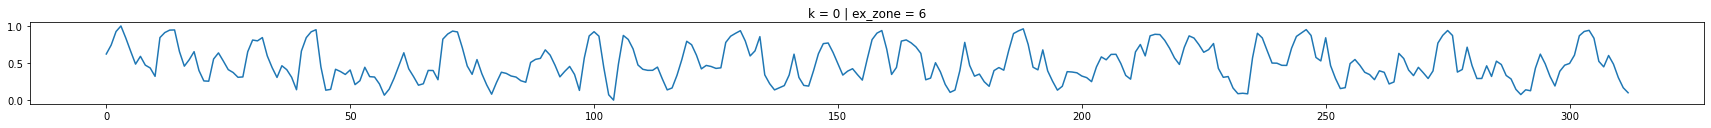

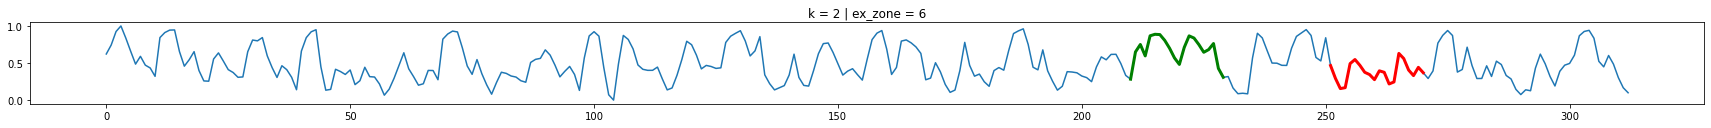

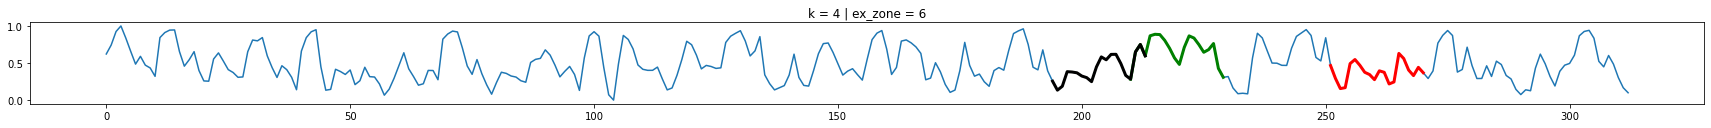

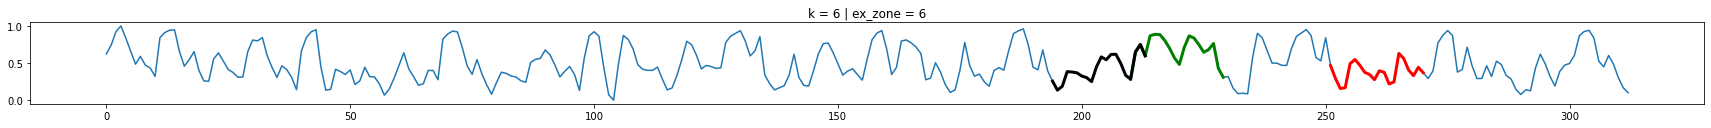

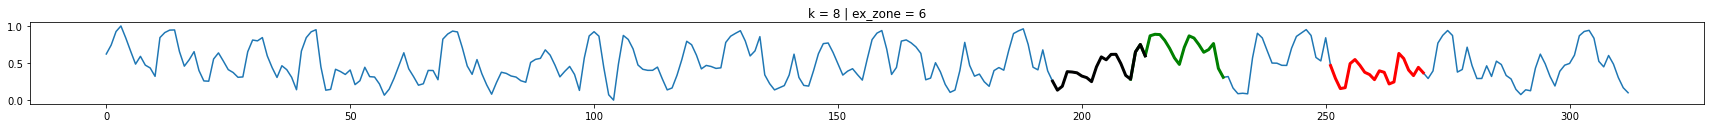

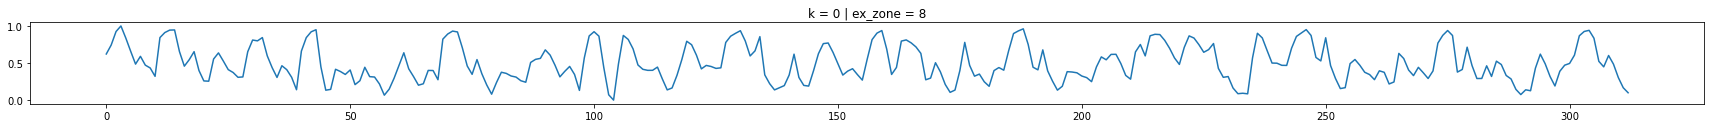

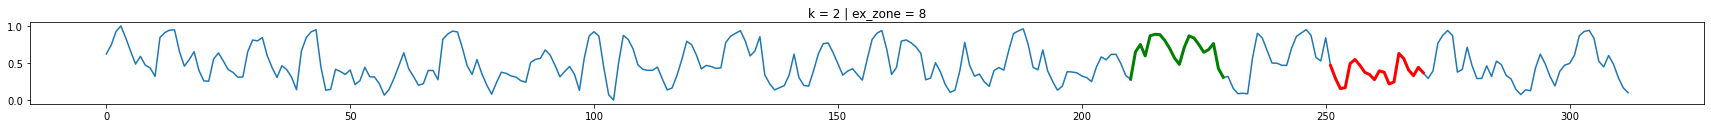

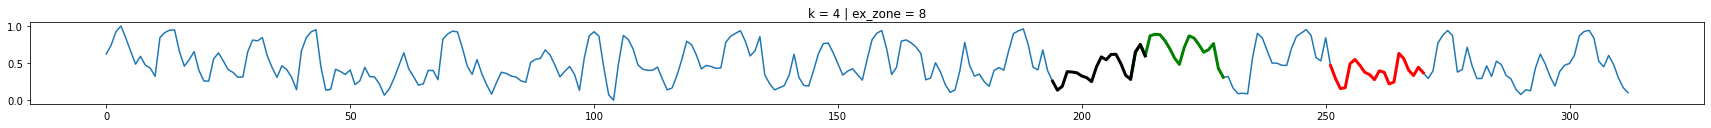

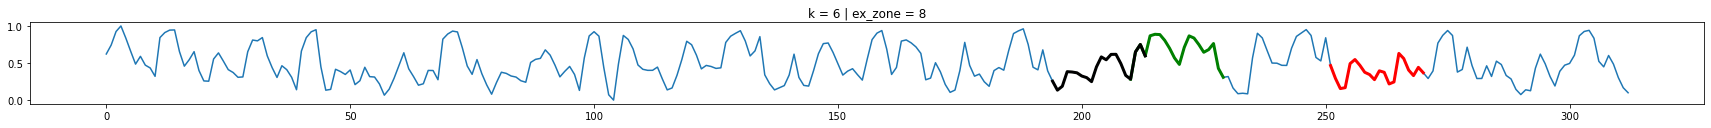

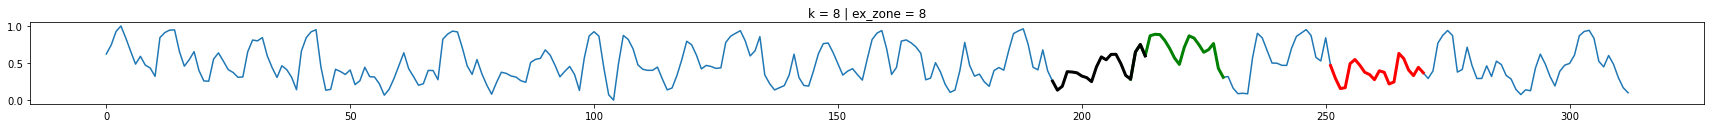

In [81]:
for e in range(0,10,2):
    for d in range(0,10,2):
        

        anoms = discords(mp, ex_zone=e, k=d)
        anoms

        plt.figure(figsize=(30, 1.5))         
        plt.plot(ts1.values)
        plt.title('k = {} | ex_zone = {}'.format(d,e))
        colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
        for a, c in zip(anoms, colors):
            a_shape = ts1.values[a:a+w]
            plt.plot(range(a, a+w), a_shape, color=c, lw=3)

        plt.show()

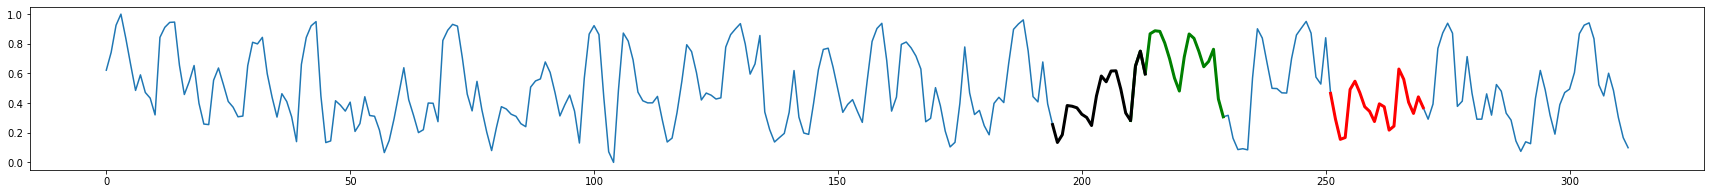

In [82]:
plt.figure(figsize=(30, 3)) 
plt.plot(ts1.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts1.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

In [83]:
anoms

array([251, 210, 194, 218, 159,  49, 278, 104])